In [1]:
pip install ST_DBSCAN

Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
import ipywidgets
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from st_dbscan import ST_DBSCAN
import matplotlib.colors as mpl_colors


DATA = pd.read_csv("sick_reviews.csv")
DATA.head()
df_X = DATA[['latitude','longitude']]
df_X.to_csv('latlong.csv')
DATA

,Unnamed: 0,Unnamed: 0.1,name,address,city,state,postal_code,latitude,longitude,text,date,score
0,21,21,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210.0,35.092564,-80.859132,I love sushi and japanese food. I was looking...,2012-12-06 17:14:21,0.888218
1,907,907,Yummy Yummy Chinese Restaurant,"2765 N Scottsdale Rd, Ste 105",Scottsdale,AZ,85257.0,33.478754,-111.925484,My First time in Scottsdale was last weekend. ...,2016-05-20 05:40:25,0.953063
2,908,908,Yummy Yummy Chinese Restaurant,"2765 N Scottsdale Rd, Ste 105",Scottsdale,AZ,85257.0,33.478754,-111.925484,"Ok, I am reviewing this so I will go with 3 st...",2012-06-30 18:32:20,0.999676
3,1469,1469,Piggly's At the Fair,1633 S Stapley Dr,Mesa,AZ,85204.0,33.384490,-111.804110,I ate at Pigglys for dinner last night. Had a ...,2014-05-27 01:07:26,0.945725
4,1537,1537,Arbys Restaurant Higley Rd,1927 N Higley Rd,Mesa,AZ,85205.0,33.450262,-111.718404,I rated this a 1 star because the guy that ser...,2016-09-06 05:46:17,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
12219,4665603,4665605,Burrito Express,450 N Alma School R,Mesa,AZ,85201.0,33.423499,-111.856859,I don't understand why everyone likes this pla...,2011-10-24 04:09:23,0.927771
12220,4666120,4666122,Cook Out,5715 N Sharon Amity Rd,Charlotte,NC,28215.0,35.236851,-80.737976,"If you're coming here after 2:30am, don't expe...",2016-11-21 13:52:13,0.954895
12221,4666345,4666347,Cherry On Top,"32421 N Scottsdale Rd, Ste 115",Scottsdale,AZ,85266.0,33.779794,-111.923232,55 cents an ounce???? Wow. What a premium Far ...,2018-10-21 04:16:42,0.998578
12222,4666383,4666385,Subway,"4747 E Elliot Rd, Ste 33",Phoenix,AZ,85044.0,33.347499,-111.981221,Came here yesterday around 3pm & got the spicy...,2017-11-05 00:31:29,0.997833


Converting to datettime format

In [3]:
from datetime import datetime
df = pd.DataFrame()
df = DATA
date = pd.to_datetime(df['date'])
date

0       2012-12-06 17:14:21
1       2016-05-20 05:40:25
2       2012-06-30 18:32:20
3       2014-05-27 01:07:26
4       2016-09-06 05:46:17
                ...        
12219   2011-10-24 04:09:23
12220   2016-11-21 13:52:13
12221   2018-10-21 04:16:42
12222   2017-11-05 00:31:29
12223   2018-07-06 22:55:33
Name: date, Length: 12224, dtype: datetime64[ns]

Understanding how to calculate hyperparameter for time

In [4]:
df['date'] = date
print(df['date'].min())
print(df['date'].max())
print(df['date'] - df['date'].min())
print((df['date'].max() - df['date'].min()))

2005-12-28 20:28:33
2018-11-14 15:28:32
0       2534 days 20:45:48
1       3795 days 09:11:52
2       2375 days 22:03:47
3       3071 days 04:38:53
4       3904 days 09:17:44
               ...        
12219   2125 days 07:40:50
12220   3980 days 17:23:40
12221   4679 days 07:48:09
12222   4329 days 04:02:56
12223   4573 days 02:27:00
Name: date, Length: 12224, dtype: timedelta64[ns]
4703 days 18:59:59


In [5]:
import calendar
df['Month']=0
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

In [6]:
df.dtypes

Unnamed: 0               int64
Unnamed: 0.1             int64
name                    object
address                 object
city                    object
state                   object
postal_code            float64
latitude               float64
longitude              float64
text                    object
date            datetime64[ns]
score                  float64
Month                   object
dtype: object

Understanding how to calculate distance parameter

In [7]:
print(df['latitude'].min())
print(df['latitude'].max())
print((df['latitude'].max() - df['latitude'].min()))
print(df['longitude'].min())
print(df['longitude'].max())

33.2178145
43.252157700000005
10.034343200000002
-115.4354310036
-79.65014920000002


In [8]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [9]:
import geopy.distance

coords_1 = (33.2178145,-115.4354310036 )
coords_2 = (43.252157700000005, -79.65014920000002)

print(geopy.distance.vincenty(coords_1, coords_2).km)

3295.434593709583


/Users/zainabazizzaveri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  


In [10]:
# normalize the data
df['latitude'] = (df['latitude'] - df['latitude'].min()) / (df['latitude'].max() - df['latitude'].min())

In [11]:
df['longitude'] = (df['longitude'] - df['longitude'].min()) / (df['longitude'].max() - df['longitude'].min())

In [12]:
df['date'] = (df['date'] - df['date'].min()) / (df['date'].max() - df['date'].min())

In [13]:
# transform to numpy array
data = df.loc[:, ['date','latitude','longitude']].values

Calculating value for n

In [14]:
import math
n = 7099
min_samples = 8*math.log(n)
min_samples

70.94167366431509

Running model

In [15]:
st_dbscan = ST_DBSCAN(eps1 = 0.05, eps2 = 0.00063789, min_samples = 18) 
# for list of all parameter description see - src code comments

In [16]:
st_dbscan.fit(data)

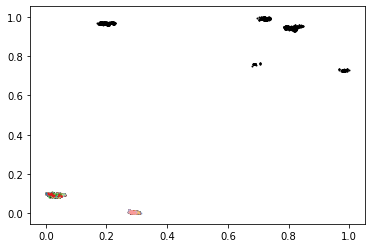

In [17]:
def plot(data, labels):
    colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']
    
    for i in range(-1, len(set(labels))):
        if i == -1:
            col = [0, 0, 0, 1]
        else:
            col = colors[i % len(colors)]
        
        clust = data[np.where(labels==i)]
        plt.scatter(clust[:,0], clust[:,1], c=[col], s=1)
    plt.show()

    return None

plot(data[:,1:], st_dbscan.labels)

All unique clusters

In [18]:
df['cluster'] = st_dbscan.labels.tolist()
df['cluster'].unique()

array([ -1,   0,  87,  12,   1,   2,  65,   3,  67,   4,   5,   6,   7,
        42, 112,   8,  50,  98,   9, 109,  10,  38,  78,  11,  20,  13,
        14,  48,  15,  16,  17,  51, 102,  94,  83,  18,  79,  19,  21,
        22,  23,  24,  25,  26,  27,  32,  47,  28,  71,  29, 111,  30,
       101,  41,  96,  31, 105,  75, 108,  33,  34,  35,  97,  95,  68,
        36,  37, 104,  57,  53, 103,  92, 115,  52,  39,  40,  61,  88,
        43,  44,  81,  55,  45,  76,  99,  46,  49,  90, 113,  56,  54,
       107,  59, 114,  58,  91,  93,  60,  74, 106,  77,  62,  63, 100,
        64,  66,  85,  70,  73,  69,  80,  72,  82,  84,  86,  89, 110])

Removing data for years before 2014

In [19]:
df['date'] = date
df['year'] = df[('date')].dt.year 
df['month'] = df[('date')].dt.month 
df = df[df['year']>=2014]

In [20]:
df[df.cluster == 0]

,Unnamed: 0,Unnamed: 0.1,name,address,city,state,postal_code,latitude,longitude,text,date,score,Month,cluster,year,month
4,1537,1537,Arbys Restaurant Higley Rd,1927 N Higley Rd,Mesa,AZ,85205.0,0.023165,0.103870,I rated this a 1 star because the guy that ser...,2016-09-06 05:46:17,1.000000,,0,2016,9
78,30168,30168,BLD Chandler,1920 W Germann Rd,Chandler,AZ,85286.0,0.005899,0.099485,I decided to give this place a second chance a...,2016-09-06 03:09:06,0.869326,,0,2016,9
328,129898,129898,Cafe Monarch,6939 E 1st Ave,Scottsdale,AZ,85251.0,0.027546,0.097917,It is with great sadness that I give Monarch a...,2016-09-08 23:00:26,0.999968,,0,2016,9
705,269204,269204,Holiday Inn Express & Suites Scottsdale - Old ...,3131 N Scottsdale Rd,Scottsdale,AZ,85251.0,0.026574,0.098100,"Lance, Dylan, Josh.... These three really help...",2016-09-11 00:54:20,0.595775,,0,2016,9
783,303868,303868,Chef Ben Sushi & Asian Express,13824 W McDowell Rd,Goodyear,AZ,85395.0,0.024682,0.086052,"We love going for the lunch specials, the food...",2016-09-03 02:09:53,0.572081,,0,2016,9
901,344158,344158,Cold Stone Creamery,"3330 S McClintock Dr, Ste 1",Tempe,AZ,85282.0,0.017323,0.098526,Went to Cold Stone yesterday for my birthday i...,2016-09-05 20:28:41,0.999048,,0,2016,9
1475,572799,572799,Irma's Mexican Food,9323 W Van Buren St,Tolleson,AZ,85353.0,0.023147,0.088707,This little hole in the wall should stay that ...,2016-09-08 03:35:12,0.967601,,0,2016,9
3430,1296525,1296525,Richis Diner,15609 W Bell Rd,Surprise,AZ,85374.0,0.041773,0.084935,Disappointing in every way. From the moment we...,2016-09-05 03:45:57,0.755713,,0,2016,9
3527,1338078,1338078,Fractured Prune Doughnuts,"2530 W Happy Valley Rd, Ste 1271",Phoenix,AZ,85085.0,0.049641,0.092816,"Tried strawberry shortcake, blueberry and coff...",2016-09-05 21:52:06,0.523274,,0,2016,9
3785,1431941,1431941,Abrazo Peoria Emergency Center,26900 N Lake Pleasant Pkwy,Peoria,AZ,85383.0,0.050835,0.088526,Out of pocket. Food poisoning. CT scan of abdo...,2016-09-07 09:21:03,0.604309,,0,2016,9


Remvoing cluster 0 and -1

In [21]:
df['count'] = df.groupby('cluster')['cluster'].transform('count')
df = df.drop(df[df.cluster == 0].index)
df = df.drop(df[df.cluster == -1].index)

/Users/zainabazizzaveri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
plt.clf()
# This section filters out columns
# Options to be removed are initializaed in tuples. Simply felt better because tuples are immutable.
x_irrelevant_options = ('Unnamed: 0', 'Unnamed: 1', 'name')
y_irrelevant_options = ('Unnamed: 0', 'Unnamed: 1', 'name')
x_axis_options = [e for e in df.columns if e not in x_irrelevant_options]
y_axis_options = [e for e in df.columns if e not in y_irrelevant_options]

# This section generates the widget itself
@ipywidgets.interact(x = x_axis_options, y= y_axis_options, colormap = plt.colormaps(),sym_log = True)
def plot(x = 'date',y = 'count', colormap = 'jet',sym_log = True):
    if sym_log:
        norm = mpl_colors.SymLogNorm(10)
    else:
        norm = mpl_colors.Normalize()
        
    fig, ax = plt.subplots(figsize=(16,9))
    CAX = ax.scatter(df[x],df[y], cmap=colormap, norm = norm, c=(df["count"]))
    #fig.suptitle('all_data_plot', fontsize=23)
    plt.xlabel('timeline', fontsize=18)
    plt.ylabel('number_of_compliants', fontsize=18)
    plt.colorbar(CAX, extend = 'both')
    # Rotates the x-axis labels if they are object(s) like 'shape' or 'city' to promote readability
    if df[x].dtype == 'object':
        plt.xticks(rotation=90)
    elif df[x].dtype == 'float64':
        plt.xticks(rotation=0)
    #plt.show()
    plt.savefig('all.png',dpi=1000,quality = 95,bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

interactive(children=(Dropdown(description='x', index=8, options=('Unnamed: 0.1', 'address', 'city', 'state', …

In [24]:
a = df.groupby('cluster').agg({'cluster':'count','date': ['min','max'], 'state':['min','max']})
a[('cluster','count')].unique()
a

cluster                date                     state    
          count                 min                 max   min max
cluster                                                          
1            20 2016-01-28 16:24:08 2016-02-04 00:37:01    AZ  AZ
2           212 2018-05-08 14:11:52 2018-07-01 21:21:15    NV  NV
3           120 2017-12-25 03:04:51 2018-01-26 14:39:20    NV  NV
4            39 2016-07-20 07:14:12 2016-07-31 22:38:31    NV  NV
5            44 2017-07-20 20:21:27 2017-08-03 21:24:49    NV  NV
...         ...                 ...                 ...   ...  ..
111          18 2016-02-09 03:01:07 2016-02-14 20:16:46    AZ  AZ
112          18 2017-10-12 04:52:04 2017-10-17 20:39:33    AZ  AZ
113          18 2017-11-17 01:18:54 2017-11-23 01:00:06    AZ  AZ
114          19 2015-01-23 05:14:17 2015-01-29 03:03:34    NV  NV
115          19 2015-08-01 19:18:20 2015-08-07 19:30:59    AZ  AZ

[115 rows x 5 columns]

In [25]:
for col_name in a.columns: 
    print(col_name)

('cluster', 'count')
('date', 'min')
('date', 'max')
('state', 'min')
('state', 'max')


In [26]:
a['year'] = a[('date','min')].dt.year 

In [27]:
a = a[a['year']>=2014]
a

cluster                date                     state      year
          count                 min                 max   min max      
cluster                                                                
1            20 2016-01-28 16:24:08 2016-02-04 00:37:01    AZ  AZ  2016
2           212 2018-05-08 14:11:52 2018-07-01 21:21:15    NV  NV  2018
3           120 2017-12-25 03:04:51 2018-01-26 14:39:20    NV  NV  2017
4            39 2016-07-20 07:14:12 2016-07-31 22:38:31    NV  NV  2016
5            44 2017-07-20 20:21:27 2017-08-03 21:24:49    NV  NV  2017
...         ...                 ...                 ...   ...  ..   ...
111          18 2016-02-09 03:01:07 2016-02-14 20:16:46    AZ  AZ  2016
112          18 2017-10-12 04:52:04 2017-10-17 20:39:33    AZ  AZ  2017
113          18 2017-11-17 01:18:54 2017-11-23 01:00:06    AZ  AZ  2017
114          19 2015-01-23 05:14:17 2015-01-29 03:03:34    NV  NV  2015
115          19 2015-08-01 19:18:20 2015-08-07 19:30:59    AZ  AZ  2015

[115 rows x 6 columns]

This file is to be used for cdc matching

In [29]:
a.to_csv("/Users/zainabazizzaveri/Downloads/tables/table0.05-3-9.csv")

In [30]:
df14 = df[df['year']==2014]
df14['Month'] = pd.to_datetime(df['date'], format='%m').dt.month_name()


/Users/zainabazizzaveri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
df14

,Unnamed: 0,Unnamed: 0.1,name,address,city,state,postal_code,latitude,longitude,text,date,score,Month,cluster,year,month,count
195,77476,77476,Amado's Mexican Food,6022 South McClintock Dr,Tempe,AZ,85283.0,0.014755,0.098467,"Disgusting food, got food poisoning on my birt...",2014-05-12 20:24:34,0.991175,May,19,2014,5,23
220,87888,87888,808 Tapas,"9350 W Sahara Ave, Ste 150",Las Vegas,NV,89117.0,0.291940,0.003789,The atomospher was okay. The service was above...,2014-08-13 20:38:13,1.000000,August,24,2014,8,20
418,162817,162817,Toby Keith's I Love This Bar & Grill,3475 Las Vegas Blvd S,Las Vegas,NV,89109.0,0.289125,0.007407,I ordered an Old West hamburger. The hamburge...,2014-01-05 03:15:39,0.998682,January,104,2014,1,18
511,192050,192050,Wong's Jr,8317 W Peoria Ave,Peoria,AZ,85345.0,0.036294,0.089380,We ordered take out. They were here within a t...,2014-05-11 18:09:26,0.999966,May,19,2014,5,23
517,196247,196247,Olive & Ivy,"7135 E Camelback Rd, Ste 195",Scottsdale,AZ,85251.0,0.028135,0.098000,I am so sad that I have to give this restauran...,2014-05-14 23:50:30,1.000000,May,19,2014,5,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11803,4513706,4513708,Oyshi Sushi,7293 W Sahara Ave,Las Vegas,NV,89117.0,0.291575,0.005138,"I've eaten at the other location, and liked it...",2014-07-24 13:30:46,1.000000,July,58,2014,7,21
11873,4541009,4541011,Bobby's Burger Palace,3750 South Las Vegas Blvd,Las Vegas,NV,89109.0,0.287813,0.007325,"One star for great tasting food, another star ...",2014-05-18 07:35:58,0.985623,May,56,2014,5,18
11932,4563423,4563425,Federico's Mexican Food,6680 W Peoria Ave,Glendale,AZ,85302.0,0.036303,0.090358,Dude. The experience with this place was so am...,2014-12-31 08:12:34,0.600255,December,43,2014,12,18
12012,4587562,4587564,Settebello Pizzeria Napoletana,"9350 W Sahara Ave, Ste 170",Las Vegas,NV,89117.0,0.291942,0.003794,This place had such potential. Good location. ...,2014-07-27 05:02:53,0.974832,July,58,2014,7,21


In [54]:
plt.clf()
# This section filters out columns
# Options to be removed are initializaed in tuples. Simply felt better because tuples are immutable.
x_irrelevant_options = ('Unnamed: 0', 'Unnamed: 1', 'name')
y_irrelevant_options = ('Unnamed: 0', 'Unnamed: 1', 'name')
x_axis_options = [e for e in df.columns if e not in x_irrelevant_options]
y_axis_options = [e for e in df.columns if e not in y_irrelevant_options]

# This section generates the widget itself
@ipywidgets.interact(x = x_axis_options, y= y_axis_options, colormap = plt.colormaps(),sym_log = True)
def plot(x = 'date',y = 'count', colormap = 'jet',sym_log = True):
    if sym_log:
        norm = mpl_colors.SymLogNorm(10)
    else:
        norm = mpl_colors.Normalize()
        
    fig, ax = plt.subplots(figsize=(16,9))
    CAX = ax.scatter(df14[x],df14[y], cmap=colormap, norm = norm, c=(df14["count"]))
    #fig.suptitle('2014_plot', fontsize=23)
    plt.xlabel('Month', fontsize=18)
    plt.ylabel('Number_of_complaints', fontsize=18)
    plt.colorbar(CAX, extend = 'both')
    months = mdates.MonthLocator()
    months_fmt = mdates.DateFormatter('%b')
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(months_fmt)
    # Rotates the x-axis labels if they are object(s) like 'shape' or 'city' to promote readability
    if df14[x].dtype == 'object':
        plt.xticks(rotation=90)
    elif df14[x].dtype == 'float64':
        plt.xticks(rotation=0)

    #plt.show()
    plt.savefig('2014_plot.png',dpi=1000,quality = 95,bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

interactive(children=(Dropdown(description='x', index=8, options=('Unnamed: 0.1', 'address', 'city', 'state', …

In [43]:
df15 = df[df['year']==2015]

In [55]:
plt.clf()
# This section filters out columns
# Options to be removed are initializaed in tuples. Simply felt better because tuples are immutable.
x_irrelevant_options = ('Unnamed: 0', 'Unnamed: 1', 'name')
y_irrelevant_options = ('Unnamed: 0', 'Unnamed: 1', 'name')
x_axis_options = [e for e in df.columns if e not in x_irrelevant_options]
y_axis_options = [e for e in df.columns if e not in y_irrelevant_options]

# This section generates the widget itself
@ipywidgets.interact(x = x_axis_options, y= y_axis_options, colormap = plt.colormaps(),sym_log = True)
def plot(x = 'date',y = 'count', colormap = 'jet',sym_log = True):
    if sym_log:
        norm = mpl_colors.SymLogNorm(10)
    else:
        norm = mpl_colors.Normalize()
        
    fig, ax = plt.subplots(figsize=(16,9))
    CAX = ax.scatter(df15[x],df15[y], cmap=colormap, norm = norm, c=(df15["count"]))
    #fig.suptitle('2015_plot', fontsize=23)
    plt.xlabel('Month', fontsize=18)
    plt.ylabel('Number_of_complaints', fontsize=18)
    plt.colorbar(CAX, extend = 'both')
    months = mdates.MonthLocator()
    months_fmt = mdates.DateFormatter('%b')
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(months_fmt)
    # Rotates the x-axis labels if they are object(s) like 'shape' or 'city' to promote readability
    if df15[x].dtype == 'object':
        plt.xticks(rotation=90)
    elif df15[x].dtype == 'float64':
        plt.xticks(rotation=0)

    #plt.show()
    plt.savefig('2015_plot.png',dpi=1000,quality = 95,bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

interactive(children=(Dropdown(description='x', index=8, options=('Unnamed: 0.1', 'address', 'city', 'state', …

In [35]:
df16 = df[df['year']==2016]

In [56]:
plt.clf()
# This section filters out columns
# Options to be removed are initializaed in tuples. Simply felt better because tuples are immutable.
x_irrelevant_options = ('Unnamed: 0', 'Unnamed: 1', 'name')
y_irrelevant_options = ('Unnamed: 0', 'Unnamed: 1', 'name')
x_axis_options = [e for e in df.columns if e not in x_irrelevant_options]
y_axis_options = [e for e in df.columns if e not in y_irrelevant_options]

# This section generates the widget itself
@ipywidgets.interact(x = x_axis_options, y= y_axis_options, colormap = plt.colormaps(),sym_log = True)
def plot(x = 'date',y = 'count', colormap = 'jet',sym_log = True):
    if sym_log:
        norm = mpl_colors.SymLogNorm(10)
    else:
        norm = mpl_colors.Normalize()
        
    fig, ax = plt.subplots(figsize=(16,9))
    CAX = ax.scatter(df16[x],df16[y], cmap=colormap, norm = norm, c=(df16["count"]))
    #fig.suptitle('2016_plot', fontsize=23)
    plt.xlabel('Month', fontsize=18)
    plt.ylabel('Number_of_complaints', fontsize=18)
    plt.colorbar(CAX, extend = 'both')
    months = mdates.MonthLocator()
    months_fmt = mdates.DateFormatter('%b')
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(months_fmt)
    # Rotates the x-axis labels if they are object(s) like 'shape' or 'city' to promote readability
    if df16[x].dtype == 'object':
        plt.xticks(rotation=90)
    elif df16[x].dtype == 'float64':
        plt.xticks(rotation=0)

    #plt.show()
    plt.savefig('2016_plot.png',dpi=1000,quality = 95,bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

interactive(children=(Dropdown(description='x', index=8, options=('Unnamed: 0.1', 'address', 'city', 'state', …

In [37]:
df17 = df[df['year']==2017]

In [57]:
plt.clf()
# This section filters out columns
# Options to be removed are initializaed in tuples. Simply felt better because tuples are immutable.
x_irrelevant_options = ('Unnamed: 0', 'Unnamed: 1', 'name')
y_irrelevant_options = ('Unnamed: 0', 'Unnamed: 1', 'name')
x_axis_options = [e for e in df.columns if e not in x_irrelevant_options]
y_axis_options = [e for e in df.columns if e not in y_irrelevant_options]

# This section generates the widget itself
@ipywidgets.interact(x = x_axis_options, y= y_axis_options, colormap = plt.colormaps(),sym_log = True)
def plot(x = 'date',y = 'count', colormap = 'jet',sym_log = True):
    if sym_log:
        norm = mpl_colors.SymLogNorm(10)
    else:
        norm = mpl_colors.Normalize()
        
    fig, ax = plt.subplots(figsize=(16,9))
    CAX = ax.scatter(df17[x],df17[y], cmap=colormap, norm = norm, c=(df17["count"]))
    #fig.suptitle('2017_plot', fontsize=23)
    plt.xlabel('Month', fontsize=18)
    plt.ylabel('Number_of_complaints', fontsize=18)
    plt.colorbar(CAX, extend = 'both')
    months = mdates.MonthLocator()
    months_fmt = mdates.DateFormatter('%b')
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(months_fmt)
    # Rotates the x-axis labels if they are object(s) like 'shape' or 'city' to promote readability
    if df17[x].dtype == 'object':
        plt.xticks(rotation=90)
    elif df17[x].dtype == 'float64':
        plt.xticks(rotation=0)

    #plt.show()
    plt.savefig('2017_plot.png',dpi=1000,quality = 95,bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

interactive(children=(Dropdown(description='x', index=8, options=('Unnamed: 0.1', 'address', 'city', 'state', …

In [39]:
df18 = df[df['year']==2018]

In [58]:
plt.clf()
# This section filters out columns
# Options to be removed are initializaed in tuples. Simply felt better because tuples are immutable.
x_irrelevant_options = ('Unnamed: 0', 'Unnamed: 1', 'name')
y_irrelevant_options = ('Unnamed: 0', 'Unnamed: 1', 'name')
x_axis_options = [e for e in df.columns if e not in x_irrelevant_options]
y_axis_options = [e for e in df.columns if e not in y_irrelevant_options]

# This section generates the widget itself
@ipywidgets.interact(x = x_axis_options, y= y_axis_options, colormap = plt.colormaps(),sym_log = True)
def plot(x = 'date',y = 'count', colormap = 'jet',sym_log = True):
    if sym_log:
        norm = mpl_colors.SymLogNorm(10)
    else:
        norm = mpl_colors.Normalize()
        
    fig, ax = plt.subplots(figsize=(16,9))
    CAX = ax.scatter(df18[x],df18[y], cmap=colormap, norm = norm, c=(df18["count"]))
    #fig.suptitle('2018_plot', fontsize=23)
    plt.xlabel('Month', fontsize=18)
    plt.ylabel('Number_of_complaints', fontsize=18)
    plt.colorbar(CAX, extend = 'both')
    months = mdates.MonthLocator()
    months_fmt = mdates.DateFormatter('%b')
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(months_fmt)
    # Rotates the x-axis labels if they are object(s) like 'shape' or 'city' to promote readability
    if df18[x].dtype == 'object':
        plt.xticks(rotation=90)
    elif df18[x].dtype == 'float64':
        plt.xticks(rotation=0)

    #plt.show()
    plt.savefig('2018_plot.png',dpi=1000,quality = 95,bbox_inches = "tight")

<Figure size 432x288 with 0 Axes>

interactive(children=(Dropdown(description='x', index=8, options=('Unnamed: 0.1', 'address', 'city', 'state', …